# Survey Text Preferences: Exploring Tone Patterns

In [309]:
import pandas as pd
import re

In [310]:
df = pd.read_excel('Official_Data.xlsx')
df.head(2)

,Unnamed: 0,id,age,gender,ethnicity,race,education,marital_status,income,employment,...,sample_4,sample_4_text,sample_5,sample_5_text,sample_6,sample_6_text,sample_7,sample_7_text,sample_8,sample_8_text
0,0,1,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,...,Persuasive,A few weeks ago at the Rosa Parks Pop-Up Pantr...,Original,Making mindful choices about our food is absol...,Original,"Join us in observing Ramadan, an esteemed trad...",Persuasive,Cultural competenceis the ability to effective...,Original,Understanding Latino Hunger Facts With Compass...
1,1,2,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,...,Simplier,"About 60,000 CUNY undergraduates or 25 percent...",Simplier,"In the midst of these turbulent times, countle...",Original,"The 'Generation Harvest' team, who are dedicat...",Original,"Certainly, the battle against food insecurity ...",Persuasive,"Last Friday, there was a parade in East Harlem..."


In [311]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'ethnicity', 'race', 'education',
       'marital_status', 'income', 'employment', 'language', 'disability',
       'states', 'start_time', 'end_time', 'id.1', 'sample_options_id',
       'sample_1', 'sample_1_text', 'sample_2', 'sample_2_text', 'sample_3',
       'sample_3_text', 'sample_4', 'sample_4_text', 'sample_5',
       'sample_5_text', 'sample_6', 'sample_6_text', 'sample_7',
       'sample_7_text', 'sample_8', 'sample_8_text'],
      dtype='object')

In [312]:
df.drop(['Unnamed: 0', 'sample_options_id','id.1'], axis=1, inplace=True)

In [313]:
df.shape

(15, 30)

In [315]:
df

,id,age,gender,ethnicity,race,education,marital_status,income,employment,language,...,sample_4,sample_4_text,sample_5,sample_5_text,sample_6,sample_6_text,sample_7,sample_7_text,sample_8,sample_8_text
0,1,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,...,Persuasive,A few weeks ago at the Rosa Parks Pop-Up Pantr...,Original,Making mindful choices about our food is absol...,Original,"Join us in observing Ramadan, an esteemed trad...",Persuasive,Cultural competenceis the ability to effective...,Original,Understanding Latino Hunger Facts With Compass...
1,2,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,...,Simplier,"About 60,000 CUNY undergraduates or 25 percent...",Simplier,"In the midst of these turbulent times, countle...",Original,"The 'Generation Harvest' team, who are dedicat...",Original,"Certainly, the battle against food insecurity ...",Persuasive,"Last Friday, there was a parade in East Harlem..."
2,3,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,...,Simplier,Facts About Hunger in Latino Communities. Unfa...,Empathetic,The recent downgrade in CalFresh benefits grea...,Empathetic,We all find ourselves needing a hand at one po...,Empathetic,We completely understand that making food choi...,Simplier,"At the Food Bank For New York City, we underst..."
3,4,25-34,female,hispanic,na,Associate,single,"Less than $25,000",Employed Part time,both,...,Original,Everyone needs help from time to time. If you ...,Empathetic,Cultural competenceis the ability to effective...,Empathetic,"Certainly, the battle against food insecurity ...",Persuasive,We understand the struggles of finding fresh a...,Empathetic,The recent downgrade in CalFresh benefits grea...
4,5,18-24,male,hispanic,native american,Bachelor,single,"$25,000 - $49,999",Student,both,...,Empathetic,"Generation Harvest, a group of young professio...",Persuasive,IMPACTING LIVES THROUGH INFANT FORMULA PROVISI...,Original,"Centeno, who had to retire early, is among the...",Empathetic,Lots of people celebrate Ramadan in different ...,Empathetic,A few weeks ago at the Rosa Parks Pop-Up Pantr...
5,6,25-34,female,non hispanic,white,Master,married,"$50,000 - $74,999",Employed Part time,english,...,Simplier,"SNAP, a food assistance program, recently had ...",Persuasive,Join us in our noble mission as the LA Regiona...,Empathetic,"About 60,000 CUNY undergraduates or 25 percent...",Persuasive,"Currently, many people in New York are finding...",Persuasive,"Last month, Food Bank For New York City brough..."
6,7,18-24,female,hispanic,white,Associate,single,na,Student,both,...,Simplier,Making mindful choices about our food is absol...,Original,"Right now, millions of New Yorkers are struggl...",Persuasive,"Are you aware that each week, you have an oppo...",Empathetic,NYC Food Pantries offer fresh vegetables and f...,Persuasive,"Tomorrow, many people in New York will struggl..."
7,8,25-34,non binary,hispanic,Puerto Rican,Associate,divorced,"$50,000 - $74,999",Employed Part time,both,...,Persuasive,Experience the bounty of fresh fruits and vege...,Simplier,Everyone needs help sometimes. If you need foo...,Persuasive,"Tomorrow, millions of New Yorkers will find it...",Persuasive,"This week, Food Bank For New York City is cele...",Simplier,Embracing cultural competence empowers you to ...
8,9,25-34,female,hispanic,na,Bachelor,single,"Less than $25,000",Student,both,...,Original,"Tomorrow, millions of New Yorkers will find it...",Empathetic,The latest decrease in CalFresh benefits is af...,Persuasive,The LA Regional Food Bank helps get food to pe...,Empathetic,Cultural competence incredibly values the beau...,Simplier,Emergency benefits for CalFresh are ending soo...
9,10,25-34,female,hispanic,NaN,Associate,single,"$100,000 - $149,999",Student,both,...,Empathetic,One of the most persuasive arguments for addre...,Empathetic,Urging all seniors aged 60 and ab

In [265]:
df = df.drop(['id', 'sample_1_text','sample_2_text','sample_3_text','sample_4_text','sample_5_text',
              'sample_6_text','sample_7_text','sample_8_text', 'start_time', 'end_time'], axis=1)

In [266]:
print(df.columns)
print(df.shape)
print('na value count', df.isna().sum().sum())

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')
(15, 19)
na value count 2


In [267]:
# Check for NaN values in the entire DataFrame
print(df.isna().sum())
print(df.dtypes)

age               0
gender            0
ethnicity         0
race              2
education         0
marital_status    0
income            0
employment        0
language          0
disability        0
states            0
sample_1          0
sample_2          0
sample_3          0
sample_4          0
sample_5          0
sample_6          0
sample_7          0
sample_8          0
dtype: int64
age               object
gender            object
ethnicity         object
race              object
education         object
marital_status    object
income            object
employment        object
language          object
disability        object
states            object
sample_1          object
sample_2          object
sample_3          object
sample_4          object
sample_5          object
sample_6          object
sample_7          object
sample_8          object
dtype: object


In [268]:
df.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,new York,Original,Original,Simplier,Simplier,Empathetic,Empathetic,Empathetic,Simplier


In [269]:
melted_data = df.copy()

keep_columns = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability']

melted_data = pd.melt(melted_data, id_vars=keep_columns, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],
                      var_name='sample_number', value_name='choice')

melted_data['sample_number'] = melted_data['sample_number'].str.split('_').str[1].astype(int)

sample_numbers = pd.DataFrame({'sample_number': range(1, 9)})

final_data = melted_data.merge(sample_numbers, on='sample_number')

final_data = final_data.drop('sample_number', axis=1)
final_data.head(12)


,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,Persuasive
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,Original
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,Original
3,25-34,female,hispanic,na,Associate,single,"Less than $25,000",Employed Part time,both,i do not have a disability,Empathetic
4,18-24,male,hispanic,native american,Bachelor,single,"$25,000 - $49,999",Student,both,na,Empathetic
5,25-34,female,non hispanic,white,Master,married,"$50,000 - $74,999",Employed Part time,english,i do not have a disability,Original
6,18-24,female,hispanic,white,Associate,single,na,Student,both,i do not have a disability,Empathetic
7,25-34,non binary,hispanic,Puerto Rican,Associate,divorced,"$50,000 - $74,999",Employed Part time,both,na,Original
8,25-34,female,hispanic,na,Bachelor,single,"Less than $25,000",Student,both,i do not have a disability,Original
9,25-34,female,hispanic,NaN,Associate,single,"$100,000 - $149,999",Student,both,i do not have a disability,Empathetic


In [270]:
final_data.shape

(120, 11)

In [271]:
def clean_text(text):
    if pd.isna(text) or str(text).strip().lower() == 'na' or not str(text).strip():
        cleaned_text = 'undisclosed'
    else:
        pattern = r'[^a-zA-Z0-9\s]'  # Keep letters, numbers, and spaces
        cleaned_text = re.sub(pattern, '', str(text))
    return cleaned_text
def clean_income(income):
    if income.strip().lower() == 'na' or not income.strip():
        cleaned_income = 'undisclosed'
    else:
        cleaned_income = re.sub(r'[,$]', '', income)  # Remove commas and dollar signs
    return cleaned_income
def disability_status(disability_status):
    if disability_status.lower() == "i do not have a disability":
        return "no disability"
    elif disability_status.lower() == "i have a disability":
        return "has disability"
    elif disability_status.lower() == "na":
        return "undisclosed"
    else:
        return disability_status
    

In [272]:
final_data.loc[:, 'ethnicity'] = final_data['ethnicity'].apply(clean_text)
final_data.loc[:, 'gender'] = final_data['gender'].apply(clean_text)
final_data.loc[:, 'race'] = final_data['race'].apply(clean_text)
final_data.loc[:, 'education'] = final_data['education'].apply(clean_text)
final_data.loc[:, 'marital_status'] = final_data['marital_status'].apply(clean_text)
final_data.loc[:, 'employment'] = final_data['employment'].apply(clean_text)
final_data.loc[:, 'language'] = final_data['language'].apply(clean_text)
final_data.loc[:, 'disability'] = final_data['disability'].apply(disability_status)
final_data.loc[:, 'income'] = final_data['income'].apply(clean_income)

In [273]:
# Creating interaction variable: 'Gender-Marital Status'
final_data['Gender-Marital Status'] = final_data['gender'] + '-' + final_data['marital_status']

In [274]:
final_data.drop(['gender', 'marital_status'], axis=1, inplace=True)

In [275]:
def encode_income(income_category):
    income_encoding = {
        'Less than 25000': 0,
        '25000 - 49999': 1,
        '50000 - 74999': 2,
        '75000 - 99999': 3,
        '100000 - 149999': 4,
        '150000 or more': 5,
        'prefer not to say': 6
    }
    
    return income_encoding.get(income_category, -1)


def encode_age(age_group):
    age_encoding = {
        '18-24': 0,
        '25-34': 1,
        '35-44': 2,
        '45-54': 3,
        '55-64': 4,
        '65 and above': 5,
        'Prefer not to say': 6
    }
    
    return age_encoding.get(age_group, -1)

In [276]:
final_data['income'] = final_data['income'].apply(encode_income)
final_data['age'] = final_data['age'].apply(encode_age)

In [316]:
final_data.shape

(120, 10)

In [277]:
final_data.head(3)

,age,ethnicity,race,education,income,employment,language,disability,choice,Gender-Marital Status
0,3,non hispanic,native american,High School,1,Employed Part time,both,no disability,Persuasive,female-undisclosed
1,0,hispanic,white,High School,0,Employed Part time,english,no disability,Original,male-single
2,1,non hispanic,multiracial,Associate,0,Student,english,no disability,Original,female-single


In [278]:
encoded_data = pd.get_dummies(final_data, drop_first=True)

In [279]:
encoded_data.shape

(120, 26)

In [280]:
encoded_data

,age,income,ethnicity_non hispanic,race_Puerto Rican,race_multiracial,race_native american,race_undisclosed,race_white,education_Bachelor,education_Doctorate,...,language_spanish,disability_undisclosed,choice_Original,choice_Persuasive,choice_Simplier,Gender-Marital Status_female-single,Gender-Marital Status_female-undisclosed,Gender-Marital Status_male-married,Gender-Marital Status_male-single,Gender-Marital Status_non binary-divorced
0,3,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
116,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
117,3,-1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
118,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [281]:
encoded_data.columns

Index(['age', 'income', 'ethnicity_non hispanic', 'race_Puerto Rican ',
       'race_multiracial', 'race_native american', 'race_undisclosed',
       'race_white', 'education_Bachelor', 'education_Doctorate',
       'education_High School', 'education_Master',
       'education_less than high school', 'employment_Employed Part time',
       'employment_Student', 'language_english', 'language_spanish',
       'disability_undisclosed', 'choice_Original', 'choice_Persuasive',
       'choice_Simplier', 'Gender-Marital Status_female-single',
       'Gender-Marital Status_female-undisclosed',
       'Gender-Marital Status_male-married',
       'Gender-Marital Status_male-single',
       'Gender-Marital Status_non binary-divorced'],
      dtype='object')

In [282]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

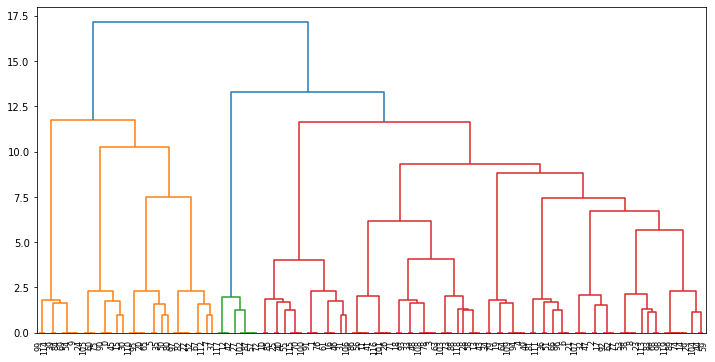

[1 3 3 3 3 1 3 1 3 1 3 3 2 3 3 1 3 3 3 3 1 3 1 3 1 3 3 2 3 3 1 3 3 3 3 1 3
 1 3 1 3 3 2 3 3 1 3 3 3 3 1 3 1 3 1 3 3 2 3 3 1 3 3 3 3 1 3 1 3 1 3 3 2 3
 3 1 3 3 3 3 1 3 1 3 1 3 3 2 3 3 1 3 3 3 3 1 3 1 3 1 3 3 2 3 3 1 3 3 3 3 1
 3 1 3 1 3 3 2 3 3]


In [301]:
linkage_matrix = linkage(encoded_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.show()
from scipy.cluster.hierarchy import fcluster
labels = fcluster(linkage_matrix, 12.5, criterion='distance')
print(labels)

In [302]:
coph_corr, _ = cophenet(linkage_matrix, pdist(encoded_data))
print(f"Cophenetic Correlation Coefficient: {coph_corr}")

Cophenetic Correlation Coefficient: 0.7926055233043029
